<a href="https://colab.research.google.com/github/sauloajs/tech-challenge-01/blob/main/Precipita%C3%A7%C3%A3o_Climatico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados de clima e produção
dados_clima = pd.read_csv('/content/dados_clima.csv')


In [ ]:
dados_clima


,Data Medicao,"NUMERO DE DIAS COM PRECIP. PLUV, MENSAL (AUT)(nÃºmero)","PRECIPITACAO TOTAL, MENSAL (AUT)(mm)","PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)","TEMPERATURA MEDIA, MENSAL (AUT)(Â°C)","VENTO, VELOCIDADE MAXIMA MENSAL (AUT)(m/s)","VENTO, VELOCIDADE MEDIA MENSAL (AUT)(m/s)",Unnamed: 7,Nome,Codigo Estacao,Latitude,Longitude,Altitude,Situacao,Data Inicial,Data Final,Periodicidade da Medicao
0,2008-01-31,8.0,119,"962,534005","23,352688","10,2","3,980242",NaN,CRUZ ALTA,A853,-28.60344,-53.673597,426.69,Operante,2008-01-01,2023-05-30,Mensal
1,2008-02-29,9.0,"86,6","962,577557","22,556399",7,"2,956236",NaN,CRUZ ALTA,A853,-28.60344,-53.673597,426.69,Operante,2008-01-01,2023-05-30,Mensal
2,2008-03-31,13.0,"72,4","963,780803","21,611553","13,2","3,034011",NaN,CRUZ ALTA,A853,-28.60344,-53.673597,426.69,Operante,2008-01-01,2023-05-30,Mensal
3,2008-04-30,12.0,"114,2","963,796111","18,47","10,8","2,520139",NaN,CRUZ ALTA,A853,-28.60344,-53.673597,426.69,Operante,2008-01-01,2023-05-30,Mensal
4,2008-05-31,10.0,75,"967,464275","14,925338","8,4","2,725314",NaN,CRUZ ALTA,A853,-28.60344,-53.673597,426.69,Operante,2008-01-01,2023-05-30,Mensal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7231,2023-01-31,10.0,"68,2","998,930102","25,805084",6,"2,028401",NaN,SANTA MARIA,A803,-29.72500,-53.720556,103.10,Operante,2008-01-01,2023-05-30,Mensal
7232,2023-02-28,10.0,"109,6","999,726459","24,295524","6,3","1,666984",NaN,SANTA MARIA,A803,-29.72500,-53.720556,103.10,Operante,2008-01-01,2023-05-30,Mensal
7233,2023-03-31,10.0,"72,4","1001,007726","24,89506","4,5","1,653653",NaN,SANTA MARIA,A803,-29.72500,-53.720556,103.10,Operante,2008-01-01,2023-05-30,Mensal
7234,2023-04-30,12.0,74,"1003,136667","19,154028","4,8","1,646667",NaN,SANTA MARIA,A803,-29.72500,-53.720556,103.10,Operante,2008-01-01,2023-05-30,Mensal


In [ ]:
dados_clima['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'] = dados_clima['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'].str.replace(',', '').astype(float)


In [ ]:
dados_clima['Ano'] = pd.to_datetime(dados_clima['Data Medicao']).dt.year


In [ ]:
precipitacao_total_por_ano = dados_clima.groupby('Ano')['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'].sum()


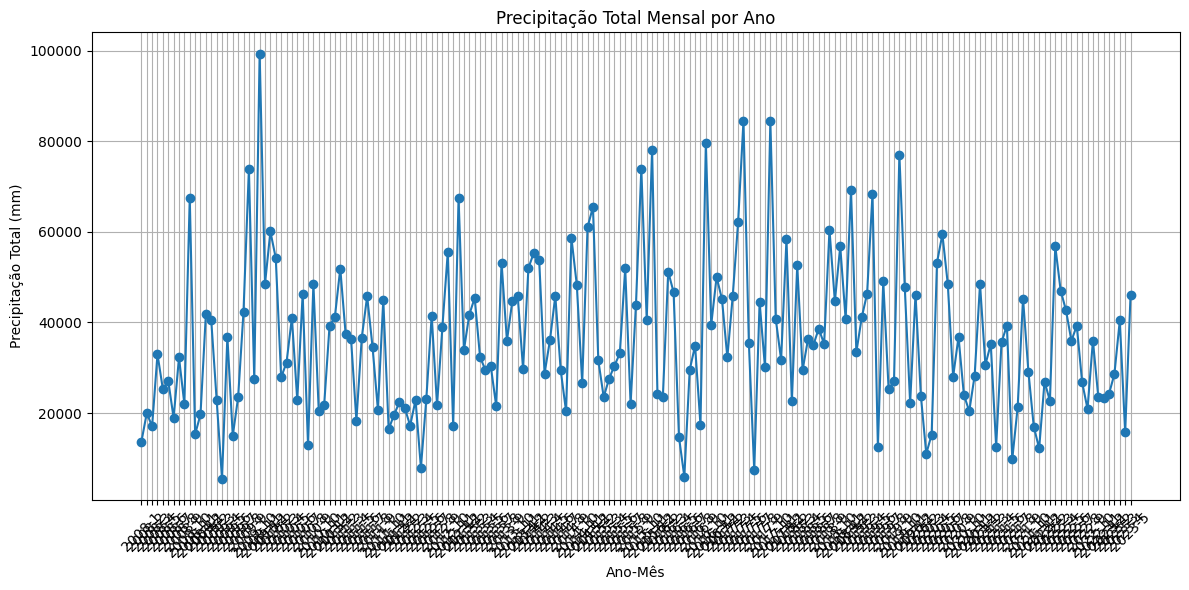

In [ ]:
# Convertendo a coluna 'Data Medicao' para datetime
dados_clima['Data Medicao'] = pd.to_datetime(dados_clima['Data Medicao'])

# Criando colunas 'Ano' e 'Mes' a partir da coluna 'Data Medicao'
dados_clima['Ano'] = dados_clima['Data Medicao'].dt.year
dados_clima['Mes'] = dados_clima['Data Medicao'].dt.month

# Agrupando por 'Ano' e 'Mes' e somando a precipitação
precipitacao_total_por_mes_e_ano = dados_clima.groupby(['Ano', 'Mes'])['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'].sum().reset_index()

# Criando uma nova coluna combinando Ano e Mes para o eixo x
precipitacao_total_por_mes_e_ano['Ano_Mes'] = precipitacao_total_por_mes_e_ano['Ano'].astype(str) + '-' + precipitacao_total_por_mes_e_ano['Mes'].astype(str)

# Plotando os dados
plt.figure(figsize=(12, 6))
plt.plot(precipitacao_total_por_mes_e_ano['Ano_Mes'], precipitacao_total_por_mes_e_ano['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'], marker='o')
plt.xticks(rotation=45)
plt.xlabel('Ano-Mês')
plt.ylabel('Precipitação Total (mm)')
plt.title('Precipitação Total Mensal por Ano')
plt.grid(True)
plt.tight_layout()
plt.show()


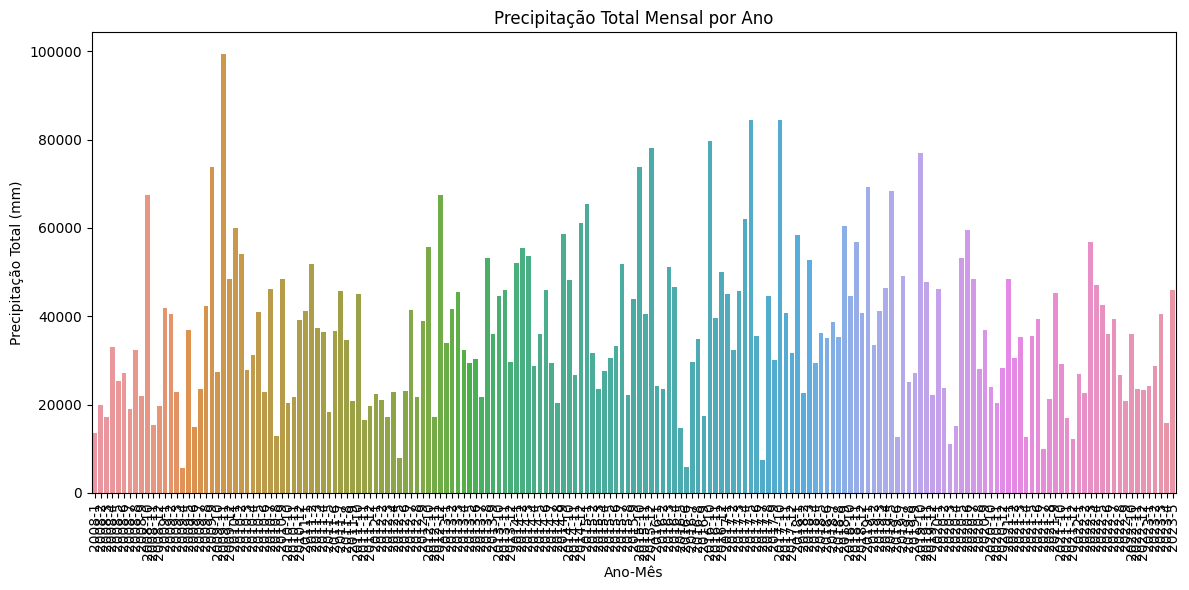

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Ano_Mes', y='PRECIPITACAO TOTAL, MENSAL (AUT)(mm)', data=precipitacao_total_por_mes_e_ano)
plt.xticks(rotation=90)
plt.xlabel('Ano-Mês')
plt.ylabel('Precipitação Total (mm)')
plt.title('Precipitação Total Mensal por Ano')
plt.tight_layout()
plt.show()


<ipython-input-16-e4a867f2a032>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = precipitacao_total_por_mes_e_ano.pivot("Mes", "Ano", "PRECIPITACAO TOTAL, MENSAL (AUT)(mm)")


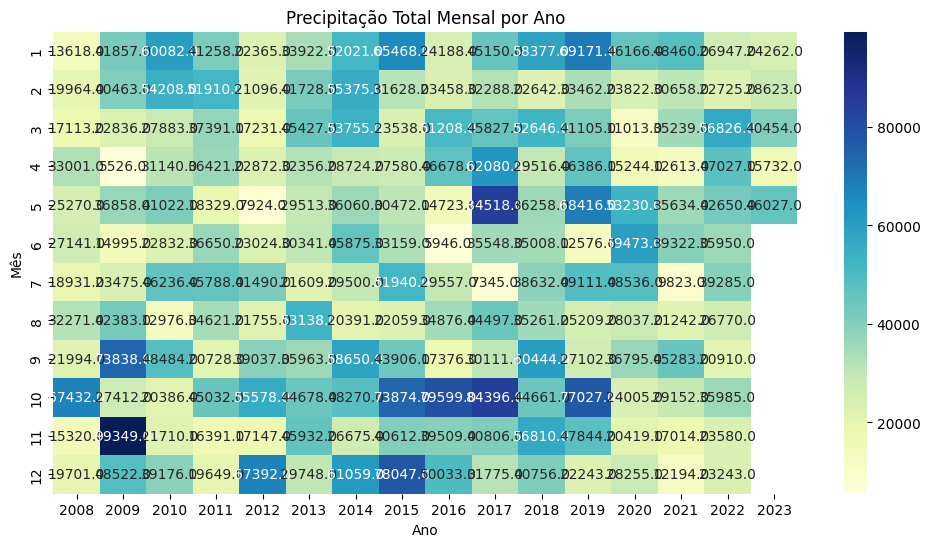

In [ ]:
# Pivot the data for the heatmap
heatmap_data = precipitacao_total_por_mes_e_ano.pivot("Mes", "Ano", "PRECIPITACAO TOTAL, MENSAL (AUT)(mm)")

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".1f")
plt.xlabel('Ano')
plt.ylabel('Mês')
plt.title('Precipitação Total Mensal por Ano')
plt.show()


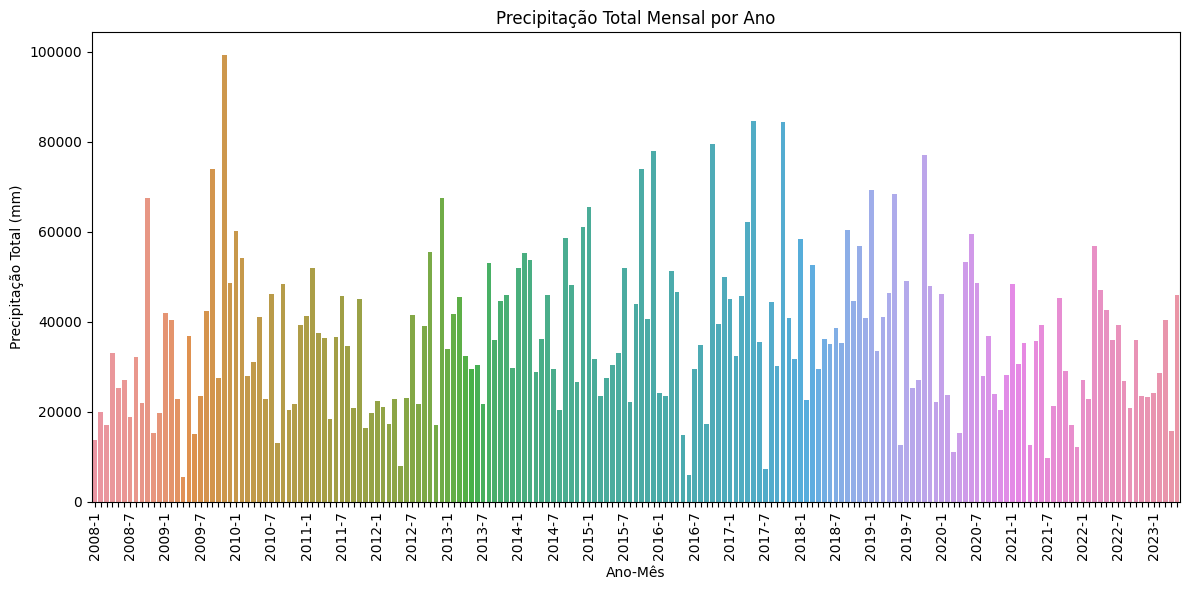

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Ano_Mes', y='PRECIPITACAO TOTAL, MENSAL (AUT)(mm)', data=precipitacao_total_por_mes_e_ano)
plt.xticks(rotation=90)

# Mostrar apenas cada 6º rótulo (por exemplo)
for ind, label in enumerate(plt.gca().xaxis.get_ticklabels()):
    if ind % 6 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.xlabel('Ano-Mês')
plt.ylabel('Precipitação Total (mm)')
plt.title('Precipitação Total Mensal por Ano')
plt.tight_layout()
plt.show()


In [ ]:
import folium
from folium.plugins import HeatMap

# Criar um mapa centrado nas coordenadas médias
map_center = [dados_clima['Latitude'].mean(), dados_clima['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=6, tiles='Stamen Terrain')

# Agrupar dados por latitude, longitude, nome e somar a precipitação total
grouped = dados_clima.groupby(['Latitude', 'Longitude', 'Nome'])['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'].sum().reset_index()

# Criar uma lista de coordenadas com valores de precipitação
heat_data = [[row['Latitude'], row['Longitude'], row['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)']] for index, row in grouped.iterrows()]

# Adicionar o HeatMap ao mapa
HeatMap(heat_data, radius=25, blur=10, max_val=grouped['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'].max()).add_to(m)

# Adicionar marcadores com informações de precipitação e nome da cidade
for index, row in grouped.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Cidade: {row['Nome']}<br>Precipitação total: {row['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)']} mm",
        icon=folium.Icon(color='blue')
    ).add_to(m)

# Mostrar o mapa
m


<ipython-input-21-805d771b0fa8>:15: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(heat_data, radius=25, blur=10, max_val=grouped['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'].max()).add_to(m)


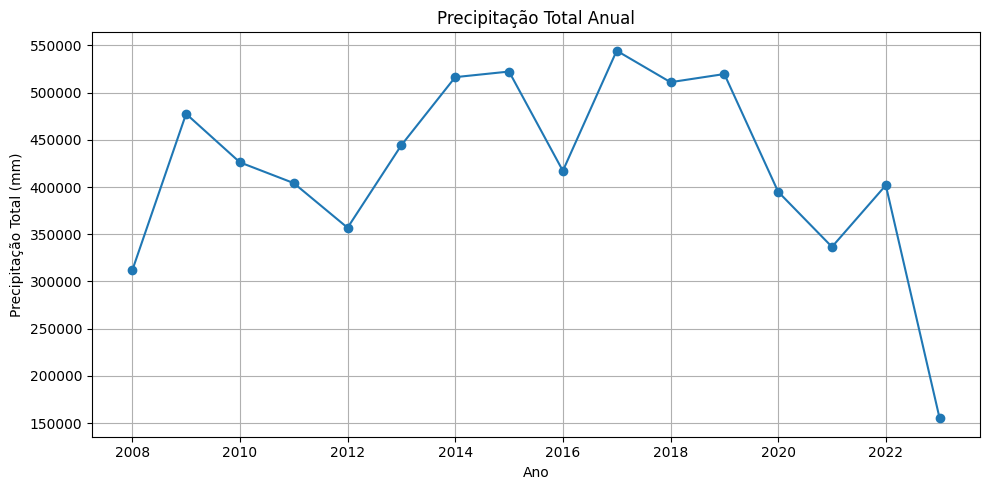

In [ ]:
# Agrupar por Ano
precipitacao_total_por_ano = dados_clima.groupby('Ano')['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'].sum().reset_index()

# Gráfico de linha
plt.figure(figsize=(10, 5))
plt.plot(precipitacao_total_por_ano['Ano'], precipitacao_total_por_ano['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'], marker='o')
plt.xlabel('Ano')
plt.ylabel('Precipitação Total (mm)')
plt.title('Precipitação Total Anual')
plt.grid(True)
plt.tight_layout()
plt.show()


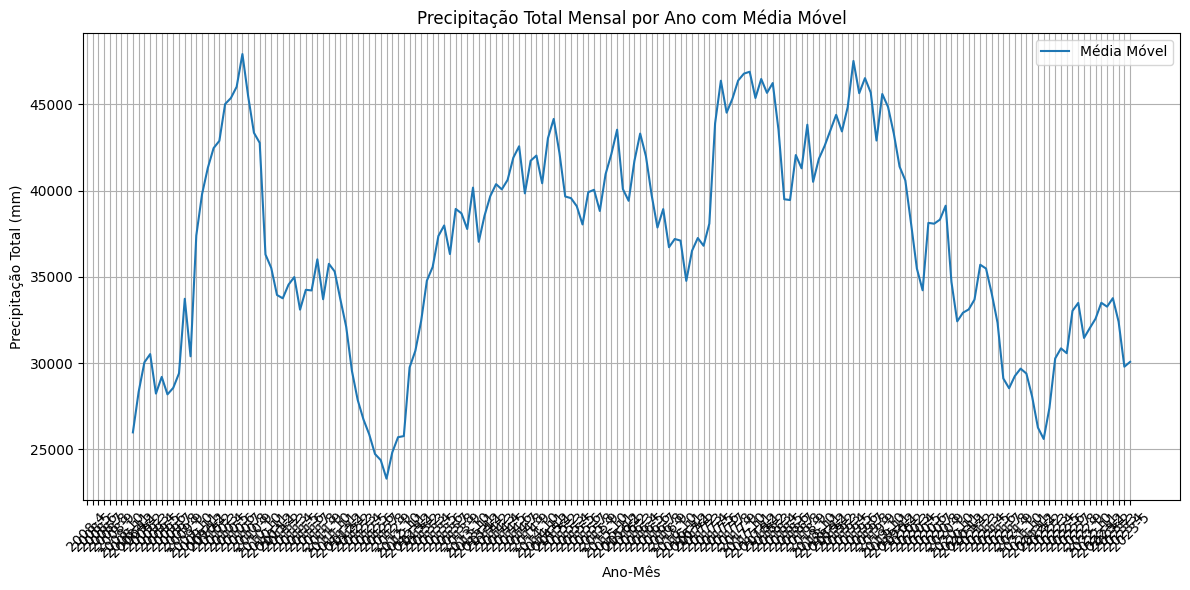

In [ ]:
# Calculando a média móvel ao longo de 12 meses
precipitacao_total_por_mes_e_ano['Media_Movel'] = precipitacao_total_por_mes_e_ano['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'].rolling(window=12).mean()

# Gráfico de linha
plt.figure(figsize=(12, 6))
plt.plot(precipitacao_total_por_mes_e_ano['Ano_Mes'], precipitacao_total_por_mes_e_ano['Media_Movel'], label='Média Móvel')
plt.xticks(rotation=45)
plt.xlabel('Ano-Mês')
plt.ylabel('Precipitação Total (mm)')
plt.title('Precipitação Total Mensal por Ano com Média Móvel')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


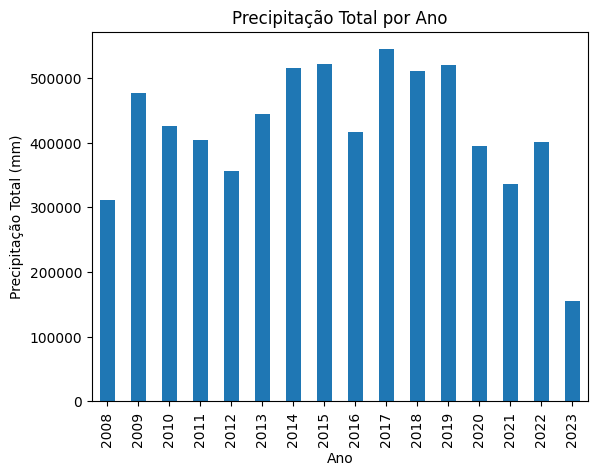

In [ ]:
import matplotlib.pyplot as plt

precipitacao_total_por_ano.plot(kind='bar')
plt.xlabel('Ano')
plt.ylabel('Precipitação Total (mm)')
plt.title('Precipitação Total por Ano')
plt.show()


In [ ]:
media_precipitacao_total = precipitacao_total_por_ano.mean()


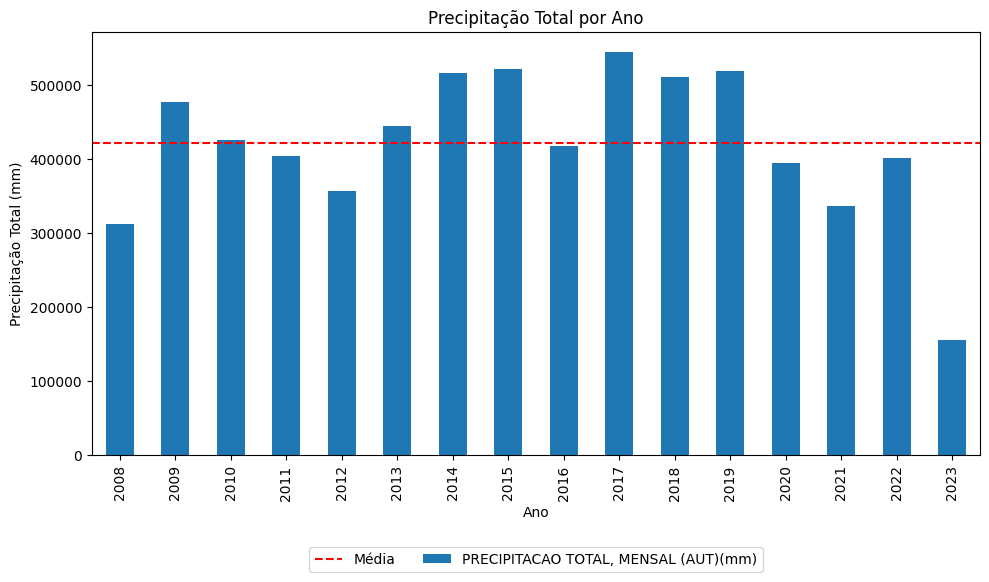

In [ ]:
plt.figure(figsize=(10, 6))
ax = precipitacao_total_por_ano.plot(kind='bar')
plt.axhline(media_precipitacao_total, color='red', linestyle='--', label='Média')
plt.xlabel('Ano')
plt.ylabel('Precipitação Total (mm)')
plt.title('Precipitação Total por Ano')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)
plt.tight_layout()
plt.show()


In [ ]:
dados_clima['Data Medicao'] = pd.to_datetime(dados_clima['Data Medicao'])
media_2015 = dados_clima[dados_clima['Data Medicao'].dt.year == 2015]['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'].mean()

print(media_2015)


1438.7961432506886


In [ ]:
dados_clima['Data Medicao'] = pd.to_datetime(dados_clima['Data Medicao'])
media_por_ano = dados_clima.groupby(dados_clima['Data Medicao'].dt.year)['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'].mean()

print(media_por_ano)


Data Medicao
2008     965.188854
2009    1253.317585
2010    1068.007519
2011    1044.361757
2012     946.713528
2013    1070.734940
2014    1366.018519
2015    1438.796143
2016    1080.702073
2017    1302.251196
2018    1110.893478
2019    1089.417191
2020     895.680272
2021     860.956522
2022     963.784173
2023     807.802083
Name: PRECIPITACAO TOTAL, MENSAL (AUT)(mm), dtype: float64


Podemos observar que a média de precipitação anual variou ao longo dos últimos 15 anos. Em alguns anos, como 2015 e 2014, houve uma média de precipitação mais alta, enquanto em outros anos, como 2021 e 2020, a média foi mais baixa.

In [ ]:
estatisticas_climaticas = dados_clima[['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)', 'TEMPERATURA MEDIA, MENSAL (AUT)(Â°C)', 'PRESSAO ATMOSFERICA, MEDIA MENSAL (AUT)(mB)', 'VENTO, VELOCIDADE MEDIA MENSAL (AUT)(m/s)']].describe()
print(estatisticas_climaticas)


       PRECIPITACAO TOTAL, MENSAL (AUT)(mm)
count                           6205.000000
mean                            1086.262208
std                              905.791033
min                                0.000000
25%                              318.000000
50%                              916.000000
75%                             1612.000000
max                             6854.000000


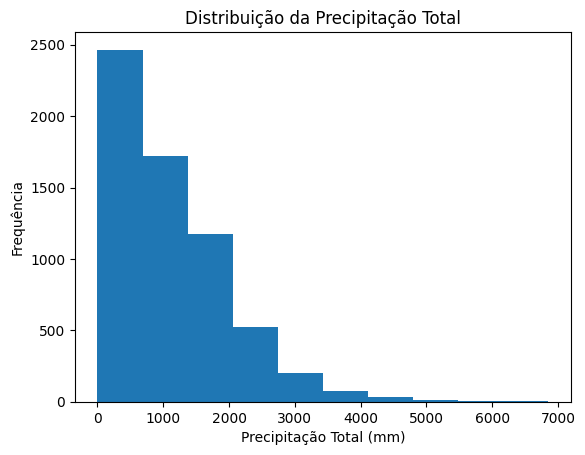

In [ ]:
import matplotlib.pyplot as plt

plt.hist(dados_clima['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'], bins=10)
plt.xlabel('Precipitação Total (mm)')
plt.ylabel('Frequência')
plt.title('Distribuição da Precipitação Total')
plt.show()


In [ ]:
estatisticas_climaticas = dados_clima.describe()
print(estatisticas_climaticas)


       NUMERO DE DIAS COM PRECIP. PLUV, MENSAL (AUT)(nÃºmero)  \
count                                        6831.000000        
mean                                           12.503879        
std                                             4.887604        
min                                             0.000000        
25%                                             9.000000        
50%                                            12.000000        
75%                                            16.000000        
max                                            29.000000        

       PRECIPITACAO TOTAL, MENSAL (AUT)(mm)  Unnamed: 7     Latitude  \
count                           6205.000000         0.0  7236.000000   
mean                            1086.262208         NaN   -29.665835   
std                              905.791033         NaN     1.410096   
min                                0.000000         NaN   -33.742222   
25%                              318.000000         Na

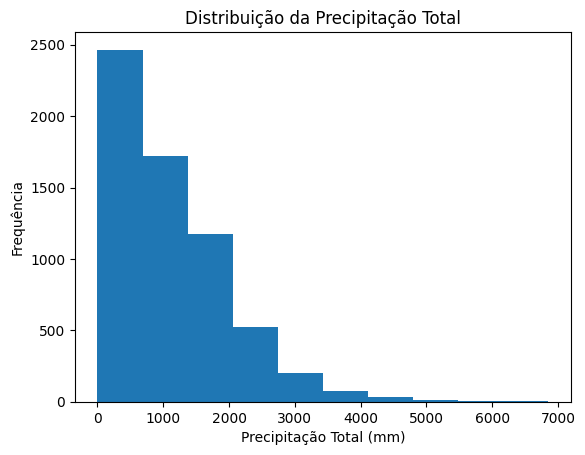

In [ ]:
import matplotlib.pyplot as plt

plt.hist(dados_clima['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'], bins=10)
plt.xlabel('Precipitação Total (mm)')
plt.ylabel('Frequência')
plt.title('Distribuição da Precipitação Total')
plt.show()


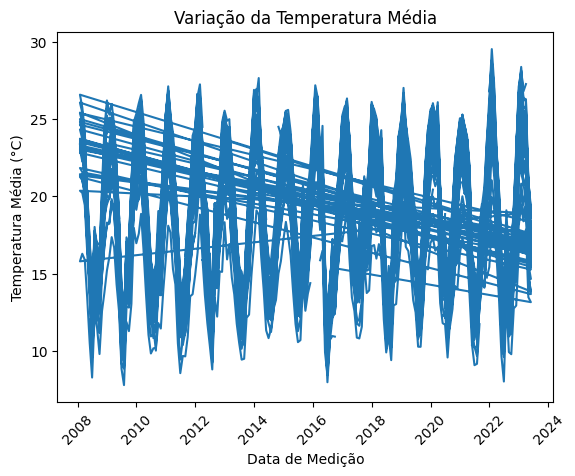

In [ ]:
# Converter a coluna 'TEMPERATURA MEDIA, MENSAL (AUT)(Â°C)' para tipo numérico
dados_clima['TEMPERATURA MEDIA, MENSAL (AUT)(Â°C)'] = dados_clima['TEMPERATURA MEDIA, MENSAL (AUT)(Â°C)'].str.replace(',', '.').astype(float)

# Plotar o gráfico de variação da temperatura média
plt.plot(dados_clima['Data Medicao'], dados_clima['TEMPERATURA MEDIA, MENSAL (AUT)(Â°C)'])
plt.xlabel('Data de Medição')
plt.ylabel('Temperatura Média (°C)')
plt.title('Variação da Temperatura Média')
plt.xticks(rotation=45)
plt.show()


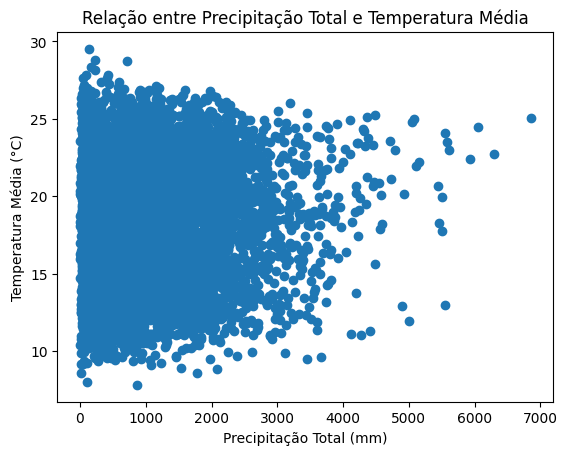

In [ ]:
# Plotar o gráfico de dispersão entre a precipitação total e a temperatura média
plt.scatter(dados_clima['PRECIPITACAO TOTAL, MENSAL (AUT)(mm)'], dados_clima['TEMPERATURA MEDIA, MENSAL (AUT)(Â°C)'])
plt.xlabel('Precipitação Total (mm)')
plt.ylabel('Temperatura Média (°C)')
plt.title('Relação entre Precipitação Total e Temperatura Média')
plt.show()


In [ ]:
correlacao = dados_clima.corr()
print(correlacao)


                                                    NUMERO DE DIAS COM PRECIP. PLUV, MENSAL (AUT)(nÃºmero)  \
NUMERO DE DIAS COM PRECIP. PLUV, MENSAL (AUT)(n...                                           1.000000        
PRECIPITACAO TOTAL, MENSAL (AUT)(mm)                                                         0.389601        
Unnamed: 7                                                                                        NaN        
Latitude                                                                                     0.011056        
Longitude                                                                                    0.316851        
Altitude                                                                                     0.150890        
Ano                                                                                         -0.041526        

                                                    PRECIPITACAO TOTAL, MENSAL (AUT)(mm)  \
NUMERO DE DIAS COM PRECIP. 

<ipython-input-103-393111622c73>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = dados_clima.corr()


In [ ]:
pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import folium

mapa_calor = folium.Map()


In [ ]:
from folium.plugins import HeatMap

dados_calor = dados_clima[['Latitude', 'Longitude', 'PRECIPITACAO TOTAL, MENSAL (AUT)(mm)']]
dados_calor = dados_calor.dropna()  # Remover linhas com valores ausentes

dados_calor_list = dados_calor.values.tolist()

HeatMap(dados_calor_list).add_to(mapa_calor)


In [ ]:
from folium.plugins import HeatMap

dados_calor = dados_clima[['Latitude', 'Longitude', 'PRECIPITACAO TOTAL, MENSAL (AUT)(mm)']]
dados_calor = dados_calor.dropna()  # Remover linhas com valores ausentes

dados_calor_list = dados_calor.values.tolist()

HeatMap(dados_calor_list).add_to(mapa_calor)


In [ ]:
import folium.plugins as plugins

# Converter as colunas de latitude e longitude para tipo numérico
dados_clima['Latitude'] = pd.to_numeric(dados_clima['Latitude'], errors='coerce')
dados_clima['Longitude'] = pd.to_numeric(dados_clima['Longitude'], errors='coerce')

# Filtrar os dados não nulos de latitude, longitude e temperatura média
dados_calor = dados_clima.dropna(subset=['Latitude', 'Longitude', 'TEMPERATURA MEDIA, MENSAL (AUT)(Â°C)'])

# Criar o mapa
mapa_calor = folium.Map(location=[-23.5505, -46.6333], zoom_start=10)

# Criar o mapa de calor
heatmap = plugins.HeatMap(
    data=dados_calor[['Latitude', 'Longitude', 'TEMPERATURA MEDIA, MENSAL (AUT)(Â°C)']].values,
    radius=15,
    blur=10,
    min_opacity=0.5,
    max_val=dados_calor['TEMPERATURA MEDIA, MENSAL (AUT)(Â°C)'].max(),
    gradient={0.4: 'blue', 0.6: 'cyan', 0.8: 'yellow', 1.0: 'red'}
)

# Adicionar o mapa de calor ao mapa
heatmap.add_to(mapa_calor)

# Exibir o mapa de calor
mapa_calor


<ipython-input-132-544f336b5961>:14: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  heatmap = plugins.HeatMap(


In [ ]:
# Remover linhas com valores ausentes na coluna de temperatura
dados_clima = dados_clima.dropna(subset=['TEMPERATURA MEDIA, MENSAL (AUT)(Â°C)'])

# Criar o mapa de calor de temperatura
heatmap = plugins.HeatMap(data=dados_clima[['Latitude', 'Longitude', 'TEMPERATURA MEDIA, MENSAL (AUT)(Â°C)']].values,
                          min_opacity=0.5,
                          radius=15,
                          blur=10,
                          gradient={0.2: 'blue', 0.4: 'cyan', 0.6: 'yellow', 1: 'red'},
                          max_val=dados_clima['TEMPERATURA MEDIA, MENSAL (AUT)(Â°C)'].max())

# Adicionar o mapa de calor ao mapa principal
heatmap.add_to(mapa_rs)

# Exibir o mapa
display(mapa_rs)


<ipython-input-148-bc6e2c2c65d7>:5: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  heatmap = plugins.HeatMap(data=dados_clima[['Latitude', 'Longitude', 'TEMPERATURA MEDIA, MENSAL (AUT)(Â°C)']].values,
